## Loading a Dataset

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


## Iterating and Visualizing the Dataset

training_data[0]
<class 'tuple'>
training_data[0][0]
<class 'torch.Tensor'>
torch.Size([1, 28, 28])
training_data.data
<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.Size([1, 28, 28])


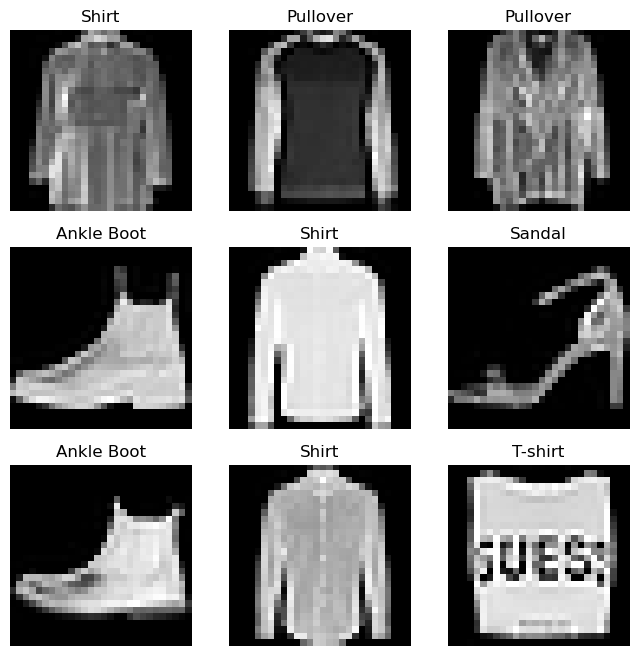

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

figure = plt.figure(figsize=(8, 8))
cols,rows = 3, 3

for i in range(1, cols * rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## Creating a Custom Dataset for your files

In [28]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [ ]:
from torch.utils.data import DataLoader

# 加载自定义数据集
# 假设你已经有一个标注文件 annotations_file 和图片文件夹 img_dir
# custom_dataset = CustomDataset(annotations_file="path/to/annotations.csv", img_dir="path/to/images", transform=ToTensor())
# custom_data_loader = DataLoader(custom_dataset, batch_size=64, shuffle=True)

train_data_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=64,shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


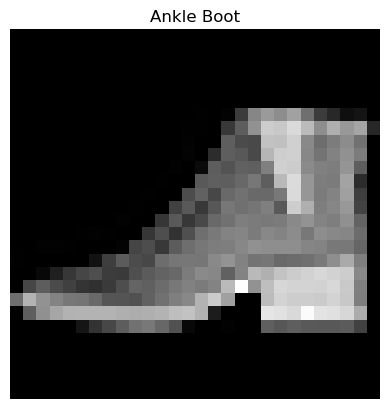

In [33]:
train_features,train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# Get cpu or gpu device for training
img = train_features[0]
label = train_labels[0]

plt.imshow(img[0], cmap="gray")
plt.title(labels_map[label.item()])
plt.axis("off")
plt.show()